# Import

In [1]:
import sys
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
sys.path.append('../garfield/')
from Resonator_formula import Resonator_longitudinal_wake, Resonator_transverse_wake
from Resonator_formula import Resonator_longitudinal_wake_potential, Resonator_transverse_wake_potential

# Gaussian line density

In [2]:
def gaussian_line_density(times, sigma):
    line_density = 1 / (np.sqrt(2*np.pi) * sigma) * np.exp(-np.power(times / sigma, 2) / 2)
    return line_density

For a gaussian line density, it is possible to compute analytically the longitudinal/transverse wake potential of a resonator. The functions are implemented in GARFIELD if the need arises. Their accuracies are compared to a numerical convolution.
Their main advantage is that they are correct for any time sampling whereas the numerical convolution will only converge once the time step is sufficiently small. As such, it is advised to perform convergence studies with the numerical convolution method to ensure the wake potential has the right shape and magnitude.

## Longitudinal

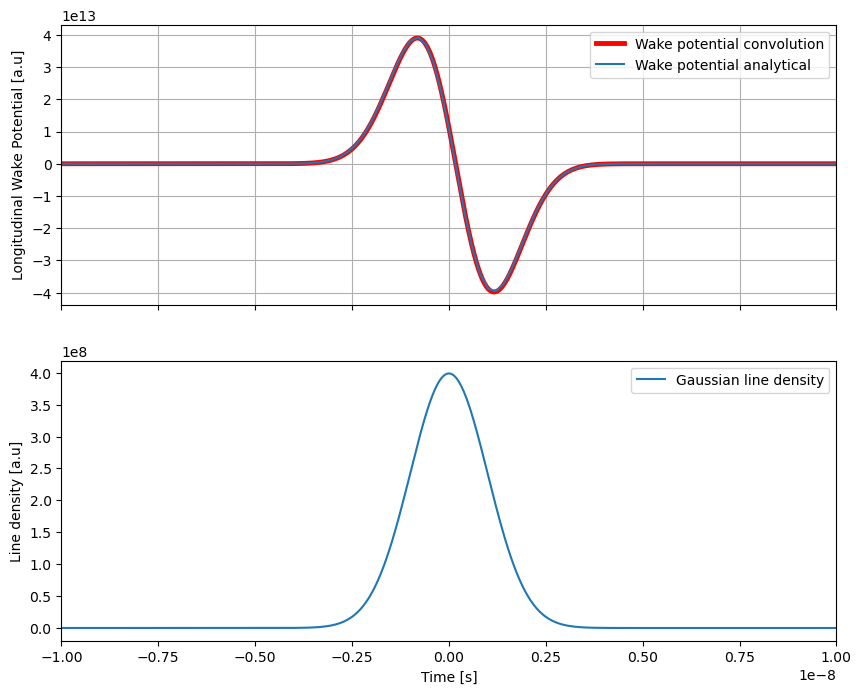

In [8]:
Rs = 1e6
Q = 1
resonant_frequency = 1e9
sigma = 1e-9

times = np.linspace(-100*sigma, 100*sigma, 10000)

convolution = signal.convolve(Resonator_longitudinal_wake(times, Rs, Q, resonant_frequency),
                   gaussian_line_density(times, sigma), mode='same') * np.diff(times)[0]

fig, ax = plt.subplots(2, figsize=(10,8), sharex=True)
ax[0].plot(times, convolution, 
         label='Wake potential convolution', color='red', alpha=1, lw=3.5)

ax[0].plot(times[::10], Resonator_longitudinal_wake_potential(times[::10], sigma, Rs, Q, resonant_frequency, use_mpmath=False), 
         ls='-', label='Wake potential analytical')

ax[1].plot(times, gaussian_line_density(times, sigma), label='Gaussian line density')

ax[0].grid()

ax[0].set_xlim(-10*sigma, 10*sigma)

ax[1].set_xlabel("Time [s]")
ax[0].set_ylabel("Longitudinal Wake Potential [a.u]")
ax[1].set_ylabel("Line density [a.u]")

ax[0].legend()
ax[1].legend()

## Transverse

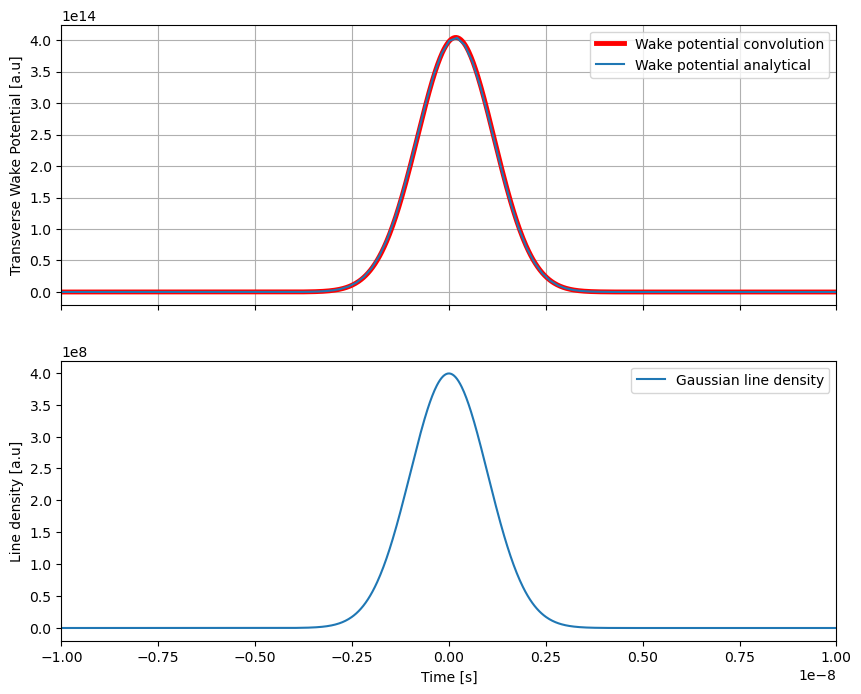

In [9]:
Rs = 1e6
Q = 1
resonant_frequency = 1e9
sigma = 1e-9

times = np.linspace(-100*sigma, 100*sigma, 10000)

convolution = signal.convolve(Resonator_transverse_wake(times, Rs, Q, resonant_frequency),
                   gaussian_line_density(times, sigma), mode='same') * np.diff(times)[0]

fig, ax = plt.subplots(2, figsize=(10,8), sharex=True)
ax[0].plot(times, convolution, 
         label='Wake potential convolution', color='red', alpha=1, lw=3.5)

ax[0].plot(times[::10], Resonator_transverse_wake_potential(times[::10], sigma, Rs, Q, resonant_frequency, use_mpmath=False), 
         ls='-', label='Wake potential analytical')

ax[1].plot(times, gaussian_line_density(times, sigma), label='Gaussian line density')

ax[0].grid()

ax[0].set_xlim(-10*sigma, 10*sigma)

ax[1].set_xlabel("Time [s]")
ax[0].set_ylabel("Transverse Wake Potential [a.u]")
ax[1].set_ylabel("Line density [a.u]")

ax[0].legend()
ax[1].legend()